In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Cette cellule importe toutes les bibliothèques nécessaires pour le projet. numpy est utilisé pour la manipulation de données numériques, tensorflow pour construire et entraîner le modèle de réseau de neurones, sklearn pour les métriques d'évaluation du modèle, et seaborn et matplotlib pour la visualisation des résultats.

In [5]:
def load_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()

    # Définir les classes qui peuvent voler (1) et celles qui ne peuvent pas voler (0)
    can_fly = [0, 2]  # avion, oiseau
    cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # toutes les autres classes

    # Créer des étiquettes binaires pour la nouvelle tâche
    train_labels = np.array([1 if label in can_fly else 0 for label in train_labels])
    test_labels = np.array([1 if label in can_fly else 0 for label in test_labels])

    # Normaliser les valeurs des pixels pour être entre 0 et 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    return train_images, train_labels, test_images, test_labels

# Charger et prétraiter les données
train_images, train_labels, test_images, test_labels = load_preprocess_data()


170498071/170498071 [==============================] - 10s 0us/step


 Cette cellule définit une fonction load_preprocess_data qui charge le dataset CIFAR-10, aplatie les étiquettes, les reclassifie en deux catégories (voler et ne pas voler), et normalise les images. Ensuite, elle appelle cette fonction pour prétraiter les données et stocker les résultats dans des variables.

In [6]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Construire le modèle
model = build_model()


Cette cellule définit une fonction build_model pour construire un modèle de réseau de neurones convolutionnel (CNN) avec plusieurs couches convolutionnelles, de max-pooling, une couche aplatie, et des couches denses. Ensuite, elle appelle cette fonction pour construire le modèle et stocker le résultat dans une variable.

In [10]:
def compile_and_train_model(model, train_images, train_labels, test_images, test_labels):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))
    return history

# Compiler et entraîner le modèle
history = compile_and_train_model(model, train_images, train_labels, test_images, test_labels)


Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 0.2788 - accuracy: 0.8876 - val_loss: 0.2851 - val_accuracy: 0.8870
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.2563 - accuracy: 0.8968 - val_loss: 0.2973 - val_accuracy: 0.8829
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.2360 - accuracy: 0.9054 - val_loss: 0.2761 - val_accuracy: 0.8901
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.2153 - accuracy: 0.9145 - val_loss: 0.2842 - val_accuracy: 0.8948
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1955 - accuracy: 0.9221 - val_loss: 0.2878 - val_accuracy: 0.8966
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.1780 - accuracy: 0.9286 - val_loss: 0.3020 - val_accuracy: 0.8890
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1579 - accuracy: 0.9361 - val_loss: 0.2964 -

Cette cellule définit une fonction compile_and_train_model pour compiler le modèle avec l'optimiseur Adam, la perte de binaires cross-entropie, et l'exactitude comme métrique. Ensuite, elle entraîne le modèle sur les données d'entraînement pendant 10 époques et utilise les données de test pour la validation. L'historique d'entraînement est stocké dans une variable.

313/313 [==============================] - 8s 25ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8000
           1       0.74      0.71      0.73      2000

    accuracy                           0.89     10000
   macro avg       0.84      0.82      0.83     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:


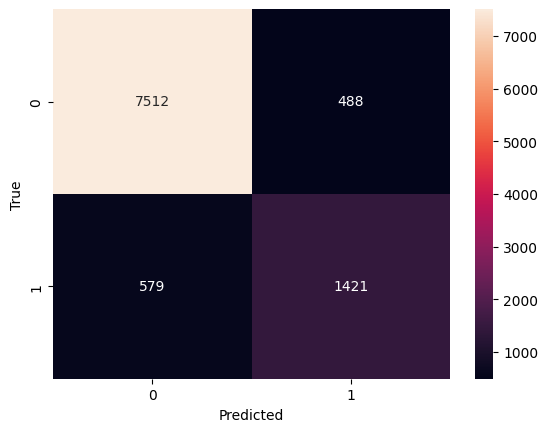

In [11]:
def evaluate_model(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predictions = (predictions > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(test_labels, predictions))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Évaluer le modèle
evaluate_model(model, test_images, test_labels)


Cette cellule définit une fonction evaluate_model pour évaluer les performances du modèle. Elle obtient les prédictions du modèle sur les données de test, les convertit en valeurs binaires, puis imprime un rapport de classification et une matrice de confusion. La matrice de confusion est visualisée avec un graphique heatmap. Ensuite, la fonction est appelée pour évaluer le modèle et afficher les résultats.